In [81]:
import csv
import matplotlib.pyplot as plt 

In [82]:
with open('csv/pokemon.csv', newline='') as csv_pokemon:
    df_pokemon = csv.reader(csv_pokemon, delimiter=',')
    liste_pokemon=[]
    i=0
    for row in df_pokemon:
        if i>0 :
            liste_pokemon.append(row)
        i +=1


In [83]:
liste_pokemon_eau = [pokemon_eau for pokemon_eau in liste_pokemon if pokemon_eau[3] == "Eau"]
liste_pokemon_eau = [[pokemon_eau[0],int(pokemon_eau[1]),int(pokemon_eau[2]),pokemon_eau[3]] for pokemon_eau in liste_pokemon_eau ]
liste_pokemon_eau = sorted(liste_pokemon_eau,key=lambda x:x[1] )

liste_pokemon_psy = [pokemon_psy for pokemon_psy in liste_pokemon if pokemon_psy[3] == "Psy"]
liste_pokemon_psy = [[pokemon_psy[0],int(pokemon_psy[1]),int(pokemon_psy[2]),pokemon_psy[3]] for pokemon_psy in liste_pokemon_psy ]
liste_pokemon_psy = sorted(liste_pokemon_psy,key=lambda x:x[1])

      

In [84]:
liste_pv_pkm_eau = [pokemon_eau[1] for pokemon_eau in liste_pokemon_eau]
liste_att_pkm_eau = [pokemon_eau[2] for pokemon_eau in liste_pokemon_eau]

liste_pv_pkm_psy = [pokemon_psy[1] for pokemon_psy in liste_pokemon_psy]
liste_att_pkm_psy = [pokemon_psy[2] for pokemon_psy in liste_pokemon_psy]


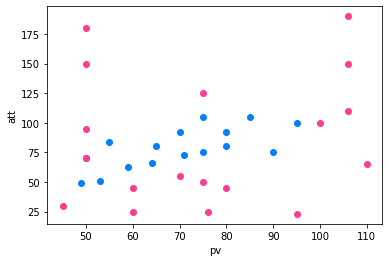

In [85]:
for pokemon in liste_pokemon_eau:
        plt.scatter(pokemon[1],pokemon[2], c='#0080ff')
for pokemon in liste_pokemon_psy:        
        plt.scatter(pokemon[1],pokemon[2], c='#fd3d92') 

plt.xlabel('pv')
plt.ylabel('att')
plt.show()   